# Unloading Manuscript
## Figures 7 and 8 
### Step 2: load the results from `manual_compute` and plot them here

created by Cassie Lumbrazo\
date: Jan 2026\
python environment: **randomforest**

latest: running on UAS linux machine


## Load Everything

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr

import copy 
import pickle
import sklearn

import matplotlib

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from sklearn.inspection import PartialDependenceDisplay

# Load model and set up for plotting

In [3]:
from joblib import dump
from joblib import load

filepath = '/home/cassie/data/unloading_regimes_analysis/'
model = load(filepath + 'updated_analysis_random_forest_model_int_20_1000_flip.joblib') # load the random forest model

In [4]:
model

RandomForestClassifier(max_depth=3, n_estimators=1000, n_jobs=15)

Also can load the new pickle file now that the it works with the new python environment and such, 

In [5]:
# model_pickle = pickle.load(open(filepath + 'updated_analysis_random_forest_model_int_20_1000_flip.pkl', 'rb')) # rb, reading
# model_pickle

In [6]:
df = pd.read_csv(filepath + 'updated_analysis_random_forest_model_int_20_1000_results_with_metdata.csv')

# load the features used in the model
local_path='/home/cassie/data/unloading_regimes_analysis/'
X_features = pd.read_csv(local_path + "X_randomforestmodel_features.csv")
y_features = pd.read_csv(local_path + "y_randomforestmodel_features.csv")

In [7]:
nametemperature_fig = "air temperature (℃)"
namewindspeed_fig = "wind speed (ms⁻¹)"
nameshortwave_fig = "shortwave radiation (Wm⁻²)"

nametemperature = "air temperature (C)"
namewindspeed = "wind speed (m/s)"
nameshortwave = "shortwave radiation (W/m2)"

# temperature_limits = (-25, 3)
# shortwave_limits = (-5, 700)
# windspeed_limits = (0, 20)

In [8]:
features_info = {
    "features": [
        nameshortwave, 
        nametemperature,
        [nameshortwave, nametemperature]   # 2-way PDP
    ],
    "kind": "average"
}

# Load PDP Dataset 
created in `Figures_7_8_manual_computation.ipynb`\
since we were having trouble adjusting the `sklearn` plotting for manuscript figure quality work

In [9]:
# Axis limits (explicit, publication-controlled)
temp_grid  = np.linspace(-25, 2, 80)
sw_grid    = np.linspace(0, 800, 80)
wind_grid  = np.linspace(0, 10, 80)

# Color scale (shared across all 2-way plots)
vmin, vmax = 0.15, 0.60
levels = np.linspace(vmin, vmax, 12)

    temp_grid=temp_grid,
    sw_grid=sw_grid,
    wind_grid=wind_grid,
    
    pdp_temp=pdp_temp,
    pdp_sw=pdp_sw,
    pdp_wind=pdp_wind,
    
    pdp_temp_sw=pdp_temp_sw,
    pdp_temp_wind=pdp_temp_wind,
    pdp_sw_wind=pdp_sw_wind,

    pdp_sw_wind_cold=pdp_sw_wind_cold, # figure 8
    pdp_sw_wind_warm=pdp_sw_wind_warm

In [11]:
# load the PDP data saved in previous script 
data = np.load("/home/cassie/python/repos/unloading_regimes_analysis/manuscript_figures/manual_pdp_figure_7_8.npz")

# Figure 7
# 1-way PDP data
pdp_temp = data["pdp_temp"]
pdp_sw = data["pdp_sw"]
pdp_wind = data["pdp_wind"]

# 2-way PDP data
pdp_temp_sw = data["pdp_temp_sw"]
pdp_temp_wind = data["pdp_temp_wind"]
pdp_sw_wind = data["pdp_sw_wind"]

# Figure 7

/home/cassie/programs/miniforge3/envs/randomforest/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


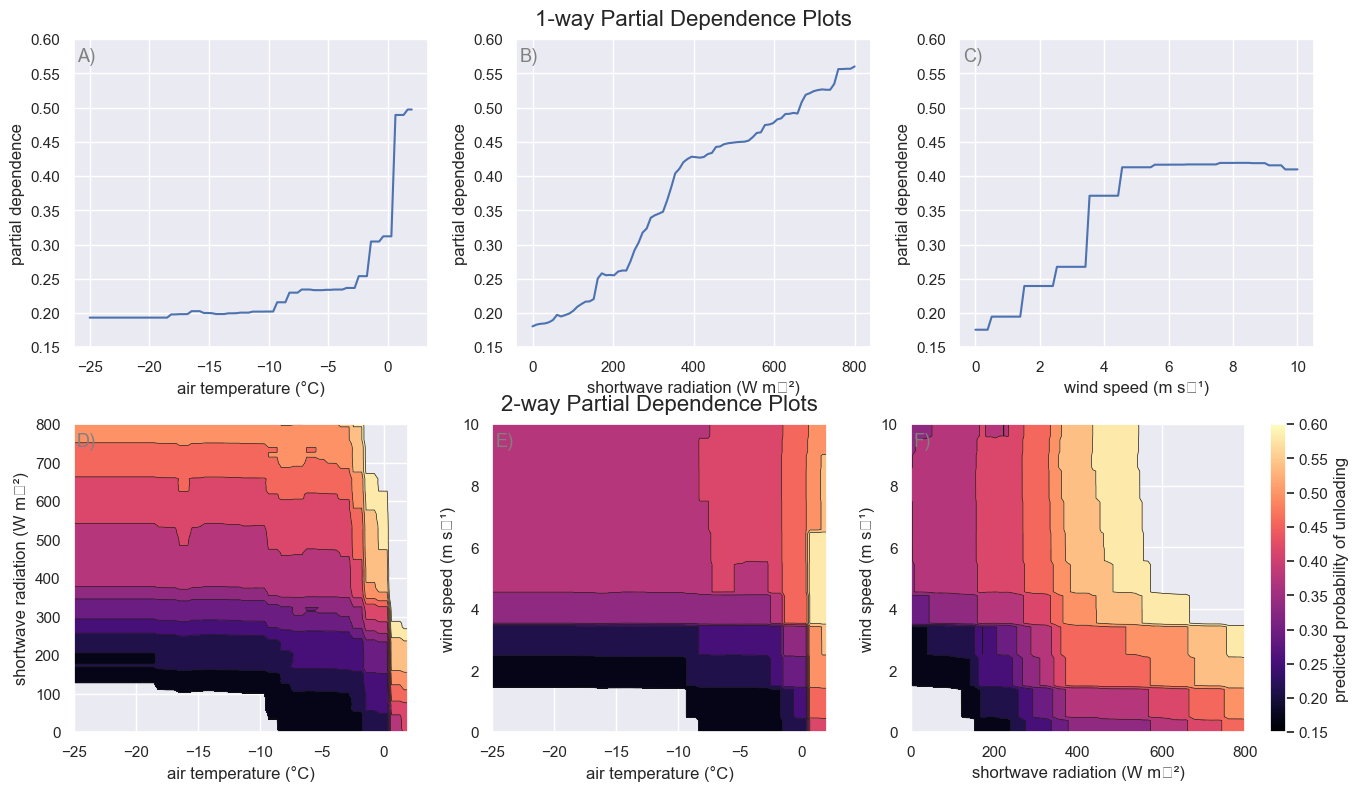

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
plt.subplots_adjust(hspace=0.25, wspace=0.25)

# -----------------
# 1-way PDPs
# -----------------
axes[0, 0].plot(temp_grid, pdp_temp)
axes[0, 1].plot(sw_grid, pdp_sw)
axes[0, 2].plot(wind_grid, pdp_wind)

axes[0, 0].set_xlabel("air temperature (°C)")
axes[0, 1].set_xlabel("shortwave radiation (W m⁻²)")
axes[0, 2].set_xlabel("wind speed (m s⁻¹)")

for ax in axes[0, :]:
    ax.set_ylabel("partial dependence")
    ax.set_ylim(vmin, vmax)

# -----------------
# 2-way PDPs
# -----------------
cs1 = axes[1, 0].contourf(
    temp_grid, sw_grid, pdp_temp_sw,
    levels=levels, cmap="magma", vmin=vmin, vmax=vmax
)
axes[1, 0].contour(temp_grid, sw_grid, pdp_temp_sw, levels=levels, colors="k", linewidths=0.5)

cs2 = axes[1, 1].contourf(
    temp_grid, wind_grid, pdp_temp_wind,
    levels=levels, cmap="magma", vmin=vmin, vmax=vmax
)
axes[1, 1].contour(temp_grid, wind_grid, pdp_temp_wind, levels=levels, colors="k", linewidths=0.5)

cs3 = axes[1, 2].contourf(
    sw_grid, wind_grid, pdp_sw_wind,
    levels=levels, cmap="magma", vmin=vmin, vmax=vmax
)
axes[1, 2].contour(sw_grid, wind_grid, pdp_sw_wind, levels=levels, colors="k", linewidths=0.5)

# Axis labels
axes[1, 0].set_xlabel("air temperature (°C)")
axes[1, 0].set_ylabel("shortwave radiation (W m⁻²)")

axes[1, 1].set_xlabel("air temperature (°C)")
axes[1, 1].set_ylabel("wind speed (m s⁻¹)")

axes[1, 2].set_xlabel("shortwave radiation (W m⁻²)")
axes[1, 2].set_ylabel("wind speed (m s⁻¹)")

# Axis limits
axes[1, 0].set_xlim(-25, 2); axes[1, 0].set_ylim(0, 800)
axes[1, 1].set_xlim(-25, 2); axes[1, 1].set_ylim(0, 10)
axes[1, 2].set_xlim(0, 800); axes[1, 2].set_ylim(0, 10)

# -----------------
# Shared colorbar
# -----------------
cbar = fig.colorbar(
    cm.ScalarMappable(cmap="magma", norm=plt.Normalize(vmin, vmax)),
    ax=axes[1, :],
    fraction=0.035,
    pad=0.02
)
cbar.set_label("predicted probability of unloading")

# -----------------
# Panel labels
# -----------------
labels = ["A", "B", "C", "D", "E", "F"]
for ax, lab in zip(axes.ravel(), labels):
    ax.text(0.01, 0.93, f"{lab})", transform=ax.transAxes,
            fontsize=13, color="gray")
    
    
# Add titles to 1-way PDPs and to the 2-way PDPs centered over the figure 
axes[0, 1].set_title("1-way Partial Dependence Plots", fontsize=16, pad=10)
axes[1, 1].set_title("2-way Partial Dependence Plots", fontsize=16, pad=10)

plt.show()


# Figure 8

Set up subset of the data

In [16]:
X_cold = X_features[X_features["air temperature (C)"] < 0].copy()
X_warm = X_features[X_features["air temperature (C)"] >= 0].copy()

# Load the PDP data from the previous script into variables to use here 
# figure 8 pdp data 2-way 
pdp_sw_wind_cold = data["pdp_sw_wind_cold"]
pdp_sw_wind_warm = data["pdp_sw_wind_warm"]

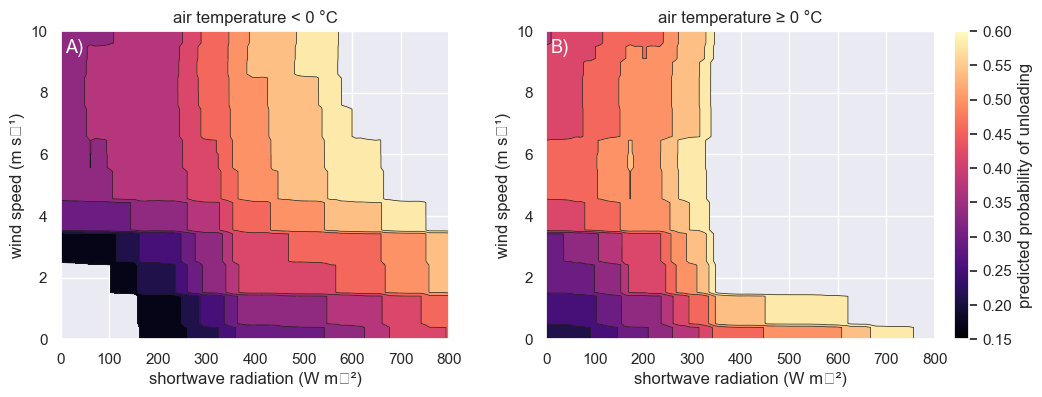

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.25)

for ax, Z, title in zip(
    axes,
    [pdp_sw_wind_cold, pdp_sw_wind_warm],
    ["air temperature < 0 °C", "air temperature ≥ 0 °C"]
):
    cf = ax.contourf(
        sw_grid, wind_grid, Z,
        levels=levels, cmap="magma",
        vmin=vmin, vmax=vmax
    )
    ax.contour(sw_grid, wind_grid, Z, levels=levels, colors="k", linewidths=0.5)
    ax.set_xlabel("shortwave radiation (W m⁻²)")
    ax.set_ylabel("wind speed (m s⁻¹)")
    ax.set_title(title)

cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=plt.Normalize(vmin, vmax), cmap="magma"),
    ax=axes, fraction=0.04, pad=0.02
)
cbar.set_label("predicted probability of unloading")

# Panel labels
axes[0].text(0.01, 0.93, "A)", transform=axes[0].transAxes,
             fontsize=13, color="white")
axes[1].text(0.01, 0.93, "B)", transform=axes[1].transAxes,
             fontsize=13, color="white")

plt.show()

# Bootstrap Implementation

In [ ]:
def bootstrap_pdp_1d(model, X, feature, grid, n_boot=200, ci=(5, 95)):
    pdps = []

    for _ in range(n_boot):
        X_bs = X.sample(frac=1.0, replace=True)
        pdps.append(compute_pdp_1d(model, X_bs, feature, grid))

    pdps = np.array(pdps)

    mean = pdps.mean(axis=0)
    lower = np.percentile(pdps, ci[0], axis=0)
    upper = np.percentile(pdps, ci[1], axis=0)

    return mean, lower, upper


Example with the air temperature PDP with confience intervals

In [ ]:
mean_t, lo_t, hi_t = bootstrap_pdp_1d(
    model, X_features, "air temperature (C)", temp_grid
)

plt.figure(figsize=(4, 3))
plt.plot(temp_grid, mean_t, color="black")
plt.fill_between(temp_grid, lo_t, hi_t, alpha=0.25)
plt.xlabel("air temperature (°C)")
plt.ylabel("partial dependence")
plt.ylim(vmin, vmax)
plt.show()

The bootstrap implementation adds confience intervals (CI) to the 1-way PDPs only (far too computationally heavy for 2-way PDP and not often used)
